In [1]:
import sys
import os
from glob import glob
sys.path.append("../NEAT")
from NEATModels import NEATStatic, nets
from NEATModels.Staticconfig  import static_config
from NEATUtils import helpers
from NEATUtils.helpers import save_json, load_json
os.environ["CUDA_VISIBLE_DEVICES"]="0"
os.environ["HDF5_USE_FILE_LOCKING"] = "FALSE"

Using TensorFlow backend.


In [2]:
npz_directory = '/home/sancere/Kepler/Incucyte/data/'
npz_name = 'Incucyte64.npz'
npz_val_name = 'Incucyte64Val.npz'


model_dir = '/home/sancere/Kepler/Incucyte/model/'
#Model name based on wether it is residual or sequntial ONEAT network
model_name = 'incucyteresnetd92.h5'


In [3]:
static_categories_json = model_dir + 'StaticCategories.json'
key_categories = load_json(static_categories_json)
static_cord_json = model_dir + 'StaticCord.json'
key_cord = load_json(static_cord_json)

#For ORNET use residual = True and for OSNET use residual = False
residual = True
#NUmber of starting convolutional filters, is doubled down with increasing depth
startfilter = 48
#CNN network start layer, mid layers and lstm layer kernel size
start_kernel = 7
mid_kernel = 3
#Network depth has to be 9n + 2, n= 3 or 4 is optimal for Notum dataset
depth = 92
#Size of the gradient descent length vector, start small and use callbacks to get smaller when reaching the minima
learning_rate = 1.0E-6
#For stochastic gradient decent, the batch size used for computing the gradients
batch_size = 100
# use softmax for single event per box, sigmoid for multi event per box
multievent = False
# Trainng image size
yolo_v0 = True
show = True
#Training epochs, longer the better with proper chosen learning rate
epochs = 250
nboxes = 1
#The inbuilt model stride which is equal to the nulber of times image was downsampled by the network
stride = 4
show = True
imagex = 64
imagey = 64

In [4]:
config = static_config(npz_directory =npz_directory, npz_name = npz_name, npz_val_name = npz_val_name, 
                         key_categories = key_categories, key_cord = key_cord, 
                         stride = stride,
                         residual = residual, depth = depth, start_kernel = start_kernel, mid_kernel = mid_kernel,
                         startfiler = startfilter, nboxes = nboxes, gridx = 1, gridy = 1, show = show,
                         epochs = epochs, learning_rate = learning_rate, imagex = imagex, imagey = imagey,
                         batch_size = batch_size, model_name = model_name, yolo_v0 = yolo_v0, multievent = multievent)

config_json = config.to_json()

print(config)
save_json(config_json, model_dir + os.path.splitext(model_name)[0] + '_Parameter.json')

static_config(batch_size=100, box_vector=2, categories=2, depth=92, epochs=250, gridx=1, gridy=1, imagex=64, imagey=64, key_categories={'Normal': 0, 'Cells': 1}, key_cord={'x': 0, 'y': 1}, learning_rate=1e-06, mid_kernel=3, model_name='incucyteresnetd92.h5', multievent=False, nboxes=1, npz_directory='/home/sancere/Kepler/Incucyte/data/', npz_name='Incucyte64.npz', npz_val_name='Incucyte64Val.npz', residual=True, show=True, start_kernel=7, startfilter=32, stride=(4,), yolo_v0=True)


number of  images:	 5176
image size (2D):		 (64, 64)
axes:				 SXYC
channels in / out:		 1
number of  images:	 273
image size (2D):		 (64, 64)
axes:				 SXYC
channels in / out:		 1
(5176, 1, 1, 4) 1














Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, None, None, 1 0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, None, None, 3 1600        input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization_1 (BatchNor (None, None, None, 3 128         conv2d_1[0][0]                   
_____________________________________________________________________________

conv2d_70 (Conv2D)              (None, None, None, 5 131584      activation_66[0][0]              
__________________________________________________________________________________________________
add_22 (Add)                    (None, None, None, 5 0           add_21[0][0]                     
                                                                 conv2d_70[0][0]                  
__________________________________________________________________________________________________
batch_normalization_67 (BatchNo (None, None, None, 5 2048        add_22[0][0]                     
__________________________________________________________________________________________________
activation_67 (Activation)      (None, None, None, 5 0           batch_normalization_67[0][0]     
__________________________________________________________________________________________________
conv2d_71 (Conv2D)              (None, None, None, 2 131328      activation_67[0][0]              
__________

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 5176 samples, validate on 273 samples
Epoch 1/250
5176/5176 [==============================] - 56s 11ms/step - loss: 4.9500 - acc: 0.3253 - val_loss: 4.7321 - val_acc: 0.2857

Epoch 00001: saving model to /home/sancere/Kepler/Incucyte/model/incucyteresnetd92.h5
{'val_loss': 4.732110966692914, 'val_acc': 0.28571428746094196, 'loss': 4.949969981884846, 'acc': 0.3253477574448451, 'lr': 1e-06}


<Figure size 432x288 with 0 Axes>

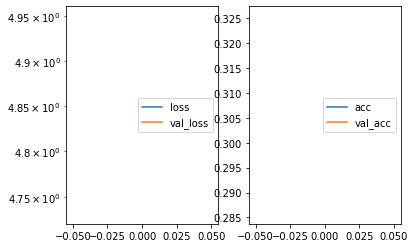

Predicted cell: Cells Probability: [[0.5211167]]
True Cell type: Cells
x [[0.5480311]]
True positional value x 0.65625
y [[0.33507553]]
True positional value y 0.5


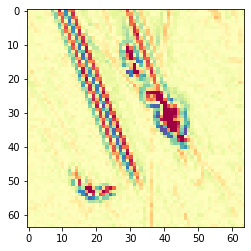

Epoch 2/250
5176/5176 [==============================] - 32s 6ms/step - loss: 4.6590 - acc: 0.4921 - val_loss: 4.6024 - val_acc: 0.3480

Epoch 00002: saving model to /home/sancere/Kepler/Incucyte/model/incucyteresnetd92.h5
{'val_loss': 4.602402386647878, 'val_acc': 0.34798534787618196, 'loss': 4.658982536339502, 'acc': 0.49207882182399126, 'lr': 1e-06}


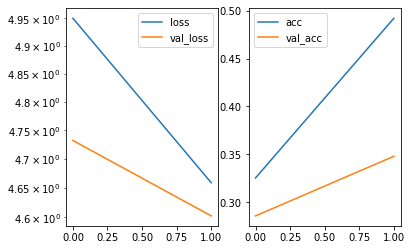

Predicted cell: Cells Probability: [[0.79909885]]
True Cell type: Normal
x [[0.65100193]]
True positional value x 0.5
y [[0.7711459]]
True positional value y 0.5


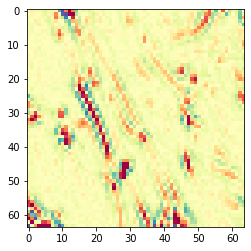

Epoch 3/250
5176/5176 [==============================] - 31s 6ms/step - loss: 4.5154 - acc: 0.4921 - val_loss: 4.4941 - val_acc: 0.5934

Epoch 00003: saving model to /home/sancere/Kepler/Incucyte/model/incucyteresnetd92.h5
{'val_loss': 4.494073993557102, 'val_acc': 0.5934065809616675, 'loss': 4.5153653743278115, 'acc': 0.4920788223191612, 'lr': 1e-06}


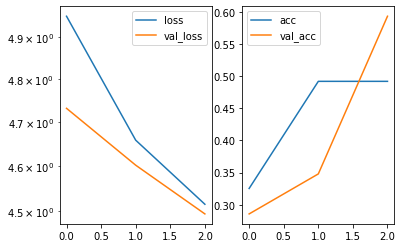

Predicted cell: Normal Probability: [[0.5170582]]
True Cell type: Cells
x [[0.44170073]]
True positional value x 0.65625
y [[0.12459624]]
True positional value y 0.34375


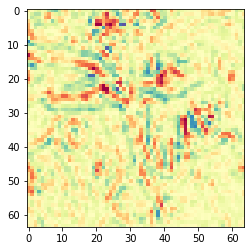

Epoch 4/250
5176/5176 [==============================] - 31s 6ms/step - loss: 4.4083 - acc: 0.5460 - val_loss: 4.4290 - val_acc: 0.6520

Epoch 00004: saving model to /home/sancere/Kepler/Incucyte/model/incucyteresnetd92.h5
{'val_loss': 4.428950239887167, 'val_acc': 0.6520146437180347, 'loss': 4.408298900728064, 'acc': 0.5459814532278494, 'lr': 1e-06}


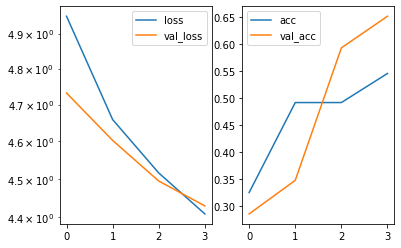

Predicted cell: Cells Probability: [[0.8758667]]
True Cell type: Cells
x [[0.71779764]]
True positional value x 0.65625
y [[0.30346888]]
True positional value y 0.34375


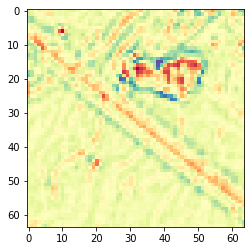

Epoch 5/250
5176/5176 [==============================] - 31s 6ms/step - loss: 4.3418 - acc: 0.6712 - val_loss: 4.3825 - val_acc: 0.6300

Epoch 00005: saving model to /home/sancere/Kepler/Incucyte/model/incucyteresnetd92.h5
{'val_loss': 4.382523541922097, 'val_acc': 0.6300366208666847, 'loss': 4.3418199360094265, 'acc': 0.671174654544229, 'lr': 1e-06}


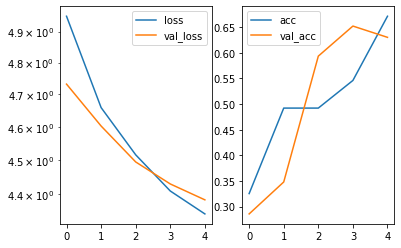

Predicted cell: Cells Probability: [[0.77590144]]
True Cell type: Cells
x [[0.28365725]]
True positional value x 0.65625
y [[0.49185565]]
True positional value y 0.5


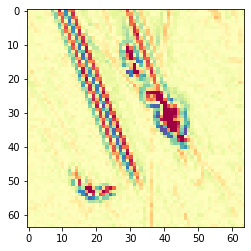

Epoch 6/250
5176/5176 [==============================] - 32s 6ms/step - loss: 4.2805 - acc: 0.7419 - val_loss: 4.3512 - val_acc: 0.7253

Epoch 00006: saving model to /home/sancere/Kepler/Incucyte/model/incucyteresnetd92.h5
{'val_loss': 4.351220997261914, 'val_acc': 0.7252747348813346, 'loss': 4.280512052488843, 'acc': 0.741885625551436, 'lr': 1e-06}


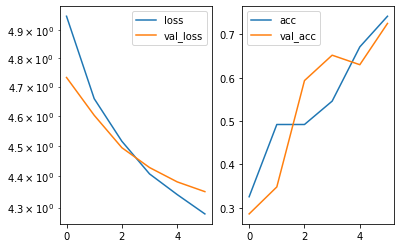

Predicted cell: Cells Probability: [[0.7281616]]
True Cell type: Normal
x [[0.35168406]]
True positional value x 0.5
y [[0.5132423]]
True positional value y 0.5


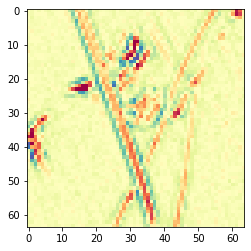

Epoch 7/250
5176/5176 [==============================] - 32s 6ms/step - loss: 4.2427 - acc: 0.7857 - val_loss: 4.3458 - val_acc: 0.7619

Epoch 00007: saving model to /home/sancere/Kepler/Incucyte/model/incucyteresnetd92.h5
{'val_loss': 4.34578598113287, 'val_acc': 0.761904742473211, 'loss': 4.242748023553462, 'acc': 0.785741883046476, 'lr': 1e-06}


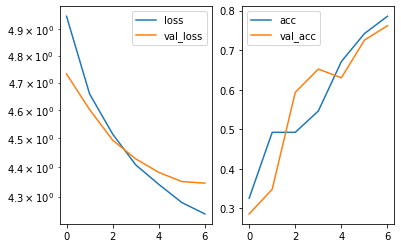

Predicted cell: Cells Probability: [[0.9496493]]
True Cell type: Normal
x [[0.27175]]
True positional value x 0.5
y [[0.5690486]]
True positional value y 0.5


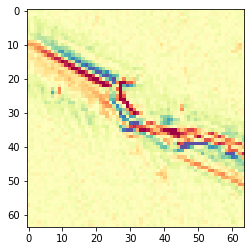

Epoch 8/250
5176/5176 [==============================] - 32s 6ms/step - loss: 4.2194 - acc: 0.8176 - val_loss: 4.3363 - val_acc: 0.7802

Epoch 00008: saving model to /home/sancere/Kepler/Incucyte/model/incucyteresnetd92.h5
{'val_loss': 4.336322389679514, 'val_acc': 0.78021976515487, 'loss': 4.219396338764999, 'acc': 0.8176197849985621, 'lr': 1e-06}


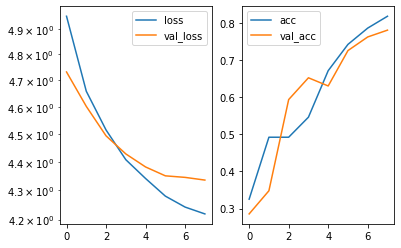

Predicted cell: Cells Probability: [[0.8822441]]
True Cell type: Cells
x [[0.19291753]]
True positional value x 0.34375
y [[0.771223]]
True positional value y 0.65625


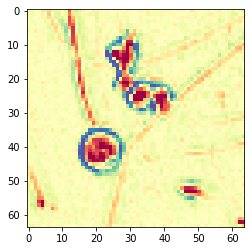

Epoch 9/250
5176/5176 [==============================] - 31s 6ms/step - loss: 4.1951 - acc: 0.8369 - val_loss: 4.3243 - val_acc: 0.7912

Epoch 00009: saving model to /home/sancere/Kepler/Incucyte/model/incucyteresnetd92.h5
{'val_loss': 4.324271886776655, 'val_acc': 0.7912087874971466, 'loss': 4.19510690653711, 'acc': 0.8369397212862048, 'lr': 1e-06}


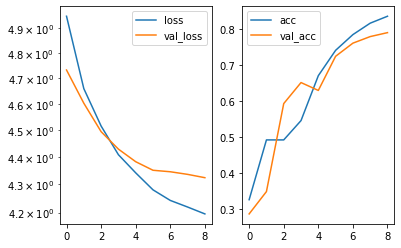

Predicted cell: Cells Probability: [[0.6969473]]
True Cell type: Cells
x [[0.49412116]]
True positional value x 0.65625
y [[0.51766014]]
True positional value y 0.34375


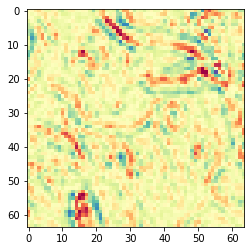

Epoch 10/250
5176/5176 [==============================] - 31s 6ms/step - loss: 4.1806 - acc: 0.8501 - val_loss: 4.3180 - val_acc: 0.7949

Epoch 00010: saving model to /home/sancere/Kepler/Incucyte/model/incucyteresnetd92.h5
{'val_loss': 4.317992123055371, 'val_acc': 0.7948717931251386, 'loss': 4.1805607369730975, 'acc': 0.8500772774035263, 'lr': 1e-06}


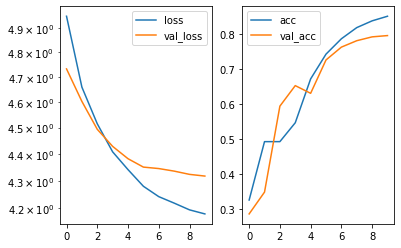

Predicted cell: Cells Probability: [[0.96592605]]
True Cell type: Cells
x [[0.86190486]]
True positional value x 0.65625
y [[0.69564515]]
True positional value y 0.5


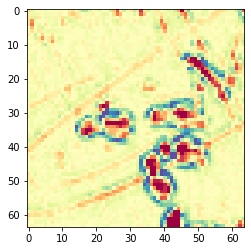

Epoch 11/250
5176/5176 [==============================] - 31s 6ms/step - loss: 4.1641 - acc: 0.8543 - val_loss: 4.3145 - val_acc: 0.8059

Epoch 00011: saving model to /home/sancere/Kepler/Incucyte/model/incucyteresnetd92.h5
{'val_loss': 4.314539207206978, 'val_acc': 0.8058608154674153, 'loss': 4.164086375759779, 'acc': 0.8543276652762842, 'lr': 1e-06}


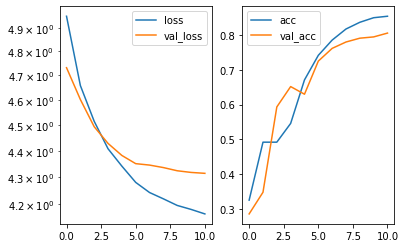

Predicted cell: Cells Probability: [[0.95167243]]
True Cell type: Cells
x [[0.43710554]]
True positional value x 0.5
y [[0.6582316]]
True positional value y 0.65625


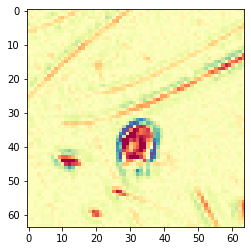

Epoch 12/250
5176/5176 [==============================] - 31s 6ms/step - loss: 4.1539 - acc: 0.8580 - val_loss: 4.3125 - val_acc: 0.8059

Epoch 00012: saving model to /home/sancere/Kepler/Incucyte/model/incucyteresnetd92.h5
{'val_loss': 4.312494337340414, 'val_acc': 0.8058608154674153, 'loss': 4.153879138749018, 'acc': 0.8579984569383736, 'lr': 1e-06}


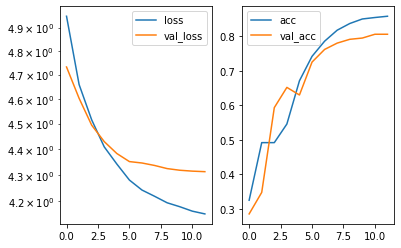

Predicted cell: Cells Probability: [[0.88311845]]
True Cell type: Normal
x [[0.5152129]]
True positional value x 0.5
y [[0.7940458]]
True positional value y 0.5


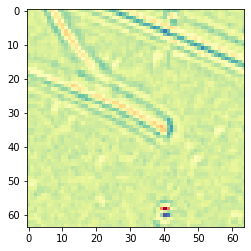

Epoch 13/250
5176/5176 [==============================] - 31s 6ms/step - loss: 4.1427 - acc: 0.8632 - val_loss: 4.3101 - val_acc: 0.8095

Epoch 00013: saving model to /home/sancere/Kepler/Incucyte/model/incucyteresnetd92.h5
{'val_loss': 4.310057861901028, 'val_acc': 0.8095238156371064, 'loss': 4.142650403416322, 'acc': 0.8632148371597714, 'lr': 1e-06}


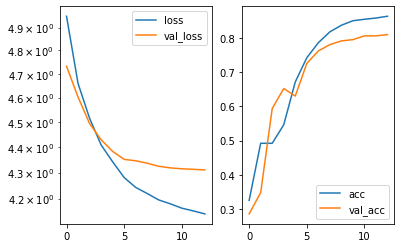

Predicted cell: Cells Probability: [[0.88155735]]
True Cell type: Cells
x [[0.60152155]]
True positional value x 0.5
y [[0.31194437]]
True positional value y 0.65625


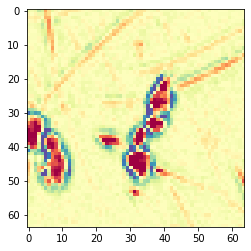

Epoch 14/250
5176/5176 [==============================] - 31s 6ms/step - loss: 4.1319 - acc: 0.8671 - val_loss: 4.3080 - val_acc: 0.8242

Epoch 00014: saving model to /home/sancere/Kepler/Incucyte/model/incucyteresnetd92.h5
{'val_loss': 4.307972864353613, 'val_acc': 0.8241758326907734, 'loss': 4.131936509605538, 'acc': 0.8670788294012433, 'lr': 1e-06}


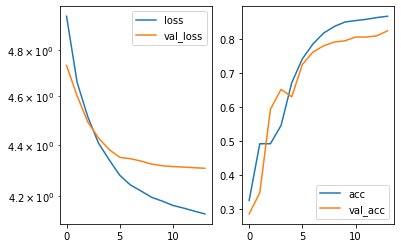

Predicted cell: Cells Probability: [[0.8971272]]
True Cell type: Cells
x [[0.58800864]]
True positional value x 0.65625
y [[0.7892531]]
True positional value y 0.65625


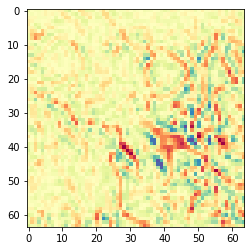

Epoch 15/250
5176/5176 [==============================] - 31s 6ms/step - loss: 4.1241 - acc: 0.8682 - val_loss: 4.3048 - val_acc: 0.8242

Epoch 00015: saving model to /home/sancere/Kepler/Incucyte/model/incucyteresnetd92.h5
{'val_loss': 4.3047848132067115, 'val_acc': 0.8241758326907734, 'loss': 4.124127955672545, 'acc': 0.8682380257378775, 'lr': 1e-06}


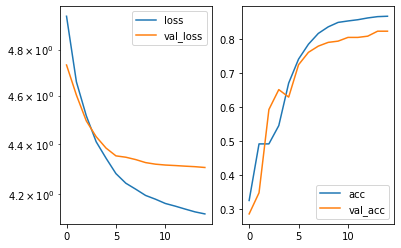

Predicted cell: Cells Probability: [[0.9090982]]
True Cell type: Cells
x [[0.32230684]]
True positional value x 0.34375
y [[0.50409955]]
True positional value y 0.5


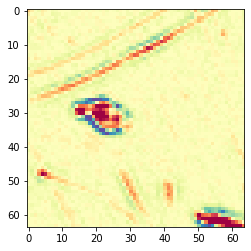

Epoch 16/250
5176/5176 [==============================] - 32s 6ms/step - loss: 4.1122 - acc: 0.8694 - val_loss: 4.3020 - val_acc: 0.8242

Epoch 00016: saving model to /home/sancere/Kepler/Incucyte/model/incucyteresnetd92.h5
{'val_loss': 4.301966275924292, 'val_acc': 0.8241758326907734, 'loss': 4.1121931365321185, 'acc': 0.8693972207847666, 'lr': 1e-06}


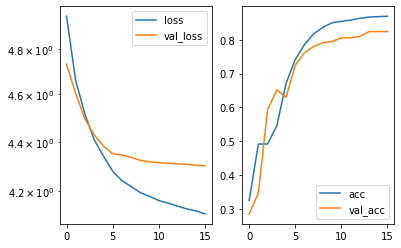

Predicted cell: Cells Probability: [[0.92794573]]
True Cell type: Cells
x [[0.6772135]]
True positional value x 0.65625
y [[0.3993804]]
True positional value y 0.34375


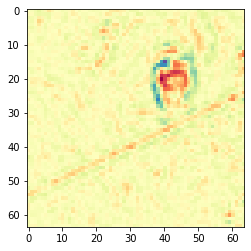

Epoch 17/250
5176/5176 [==============================] - 31s 6ms/step - loss: 4.1040 - acc: 0.8738 - val_loss: 4.2981 - val_acc: 0.8242

Epoch 00017: saving model to /home/sancere/Kepler/Incucyte/model/incucyteresnetd92.h5
{'val_loss': 4.298088575020815, 'val_acc': 0.8241758326907734, 'loss': 4.104043938645623, 'acc': 0.873840801406312, 'lr': 1e-06}


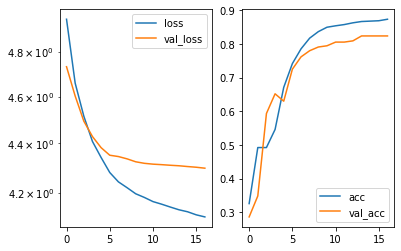

Predicted cell: Cells Probability: [[0.8720291]]
True Cell type: Cells
x [[0.37226635]]
True positional value x 0.5
y [[0.4793737]]
True positional value y 0.34375


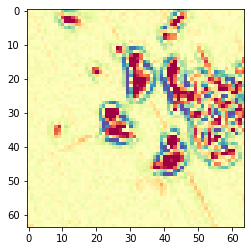

Epoch 18/250
5176/5176 [==============================] - 31s 6ms/step - loss: 4.0968 - acc: 0.8762 - val_loss: 4.2954 - val_acc: 0.8278

Epoch 00018: saving model to /home/sancere/Kepler/Incucyte/model/incucyteresnetd92.h5
{'val_loss': 4.295386413951497, 'val_acc': 0.8278388328604646, 'loss': 4.09682126336341, 'acc': 0.8761591983633764, 'lr': 1e-06}


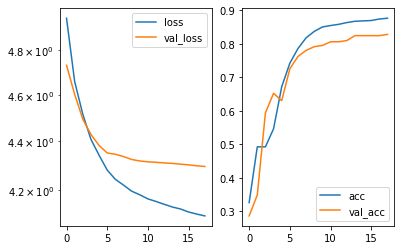

Predicted cell: Cells Probability: [[0.8462281]]
True Cell type: Cells
x [[0.4061877]]
True positional value x 0.5
y [[0.6766829]]
True positional value y 0.5


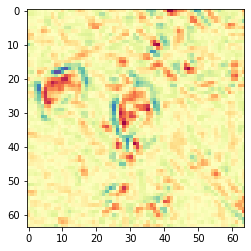

Epoch 19/250
5176/5176 [==============================] - 31s 6ms/step - loss: 4.0895 - acc: 0.8738 - val_loss: 4.2927 - val_acc: 0.8278

Epoch 00019: saving model to /home/sancere/Kepler/Incucyte/model/incucyteresnetd92.h5
{'val_loss': 4.292703127249693, 'val_acc': 0.8278388328604646, 'loss': 4.089506637552606, 'acc': 0.8738407993335076, 'lr': 1e-06}


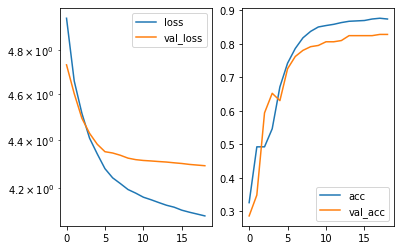

Predicted cell: Cells Probability: [[0.5850156]]
True Cell type: Cells
x [[0.49838772]]
True positional value x 0.5
y [[0.3623249]]
True positional value y 0.5


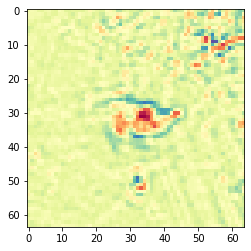

Epoch 20/250
5176/5176 [==============================] - 32s 6ms/step - loss: 4.0827 - acc: 0.8762 - val_loss: 4.2904 - val_acc: 0.8278

Epoch 00020: saving model to /home/sancere/Kepler/Incucyte/model/incucyteresnetd92.h5
{'val_loss': 4.29040952479883, 'val_acc': 0.8278388328604646, 'loss': 4.082711384137963, 'acc': 0.8761591998373707, 'lr': 1e-06}


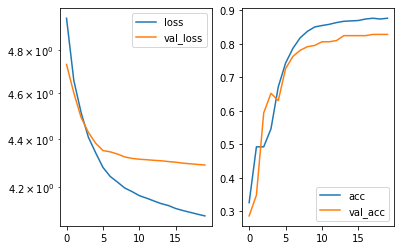

Predicted cell: Cells Probability: [[0.8741357]]
True Cell type: Cells
x [[0.50279576]]
True positional value x 0.34375
y [[0.19735184]]
True positional value y 0.34375


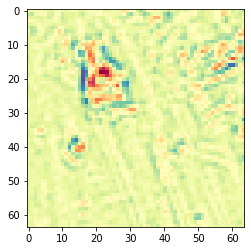

Epoch 21/250
5176/5176 [==============================] - 31s 6ms/step - loss: 4.0766 - acc: 0.8779 - val_loss: 4.2872 - val_acc: 0.8278

Epoch 00021: saving model to /home/sancere/Kepler/Incucyte/model/incucyteresnetd92.h5
{'val_loss': 4.287158117189512, 'val_acc': 0.8278388328604646, 'loss': 4.0765932938415075, 'acc': 0.877897991785863, 'lr': 1e-06}


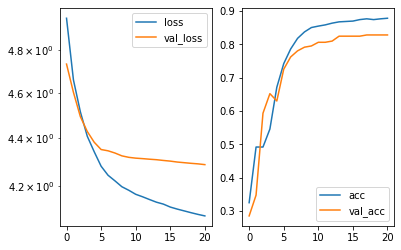

Predicted cell: Cells Probability: [[0.87309]]
True Cell type: Cells
x [[0.09401301]]
True positional value x 0.34375
y [[0.68610996]]
True positional value y 0.65625


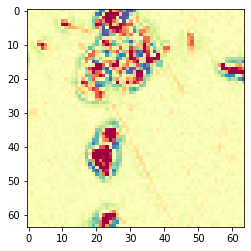

Epoch 22/250
5176/5176 [==============================] - 31s 6ms/step - loss: 4.0690 - acc: 0.8775 - val_loss: 4.2848 - val_acc: 0.8315

Epoch 00022: saving model to /home/sancere/Kepler/Incucyte/model/incucyteresnetd92.h5
{'val_loss': 4.284797476324843, 'val_acc': 0.8315018384884565, 'loss': 4.068977390227399, 'acc': 0.8775115887846054, 'lr': 1e-06}


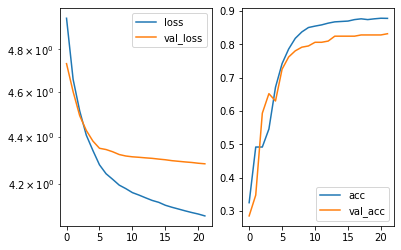

Predicted cell: Cells Probability: [[0.74688154]]
True Cell type: Cells
x [[0.48349503]]
True positional value x 0.65625
y [[0.5408955]]
True positional value y 0.34375


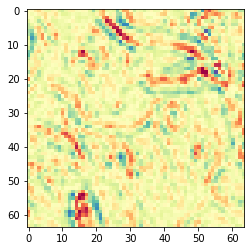

Epoch 23/250
5176/5176 [==============================] - 31s 6ms/step - loss: 4.0623 - acc: 0.8796 - val_loss: 4.2817 - val_acc: 0.8315

Epoch 00023: saving model to /home/sancere/Kepler/Incucyte/model/incucyteresnetd92.h5
{'val_loss': 4.281684237958747, 'val_acc': 0.8315018384884565, 'loss': 4.062267581130475, 'acc': 0.8796367822603612, 'lr': 1e-06}


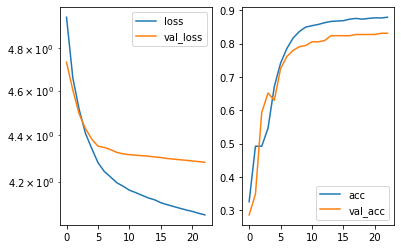

Predicted cell: Cells Probability: [[0.9130861]]
True Cell type: Cells
x [[0.6252351]]
True positional value x 0.65625
y [[0.54027134]]
True positional value y 0.65625


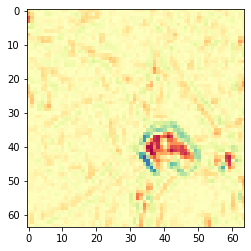

Epoch 24/250
5176/5176 [==============================] - 31s 6ms/step - loss: 4.0569 - acc: 0.8791 - val_loss: 4.2797 - val_acc: 0.8315

Epoch 00024: saving model to /home/sancere/Kepler/Incucyte/model/incucyteresnetd92.h5
{'val_loss': 4.279650904756763, 'val_acc': 0.8315018384884565, 'loss': 4.056934566733641, 'acc': 0.8790571923141686, 'lr': 1e-06}


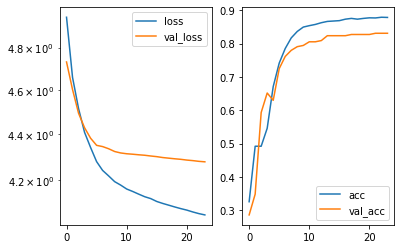

Predicted cell: Cells Probability: [[0.69850695]]
True Cell type: Normal
x [[0.51414627]]
True positional value x 0.5
y [[0.43338016]]
True positional value y 0.5


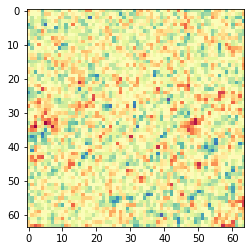

Epoch 25/250
5176/5176 [==============================] - 32s 6ms/step - loss: 4.0493 - acc: 0.8798 - val_loss: 4.2778 - val_acc: 0.8315

Epoch 00025: saving model to /home/sancere/Kepler/Incucyte/model/incucyteresnetd92.h5
{'val_loss': 4.277814164703146, 'val_acc': 0.8315018384884565, 'loss': 4.049268707425738, 'acc': 0.8798299857416698, 'lr': 1e-06}


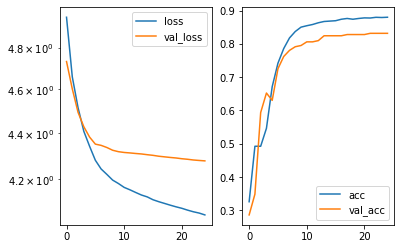

Predicted cell: Cells Probability: [[0.73592764]]
True Cell type: Cells
x [[0.70839894]]
True positional value x 0.5
y [[0.6280682]]
True positional value y 0.65625


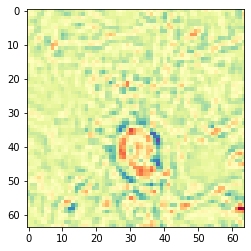

Epoch 26/250
5176/5176 [==============================] - 32s 6ms/step - loss: 4.0449 - acc: 0.8804 - val_loss: 4.2762 - val_acc: 0.8315

Epoch 00026: saving model to /home/sancere/Kepler/Incucyte/model/incucyteresnetd92.h5
{'val_loss': 4.276183105650402, 'val_acc': 0.8315018384884565, 'loss': 4.044934976598395, 'acc': 0.8804095839790804, 'lr': 1e-06}


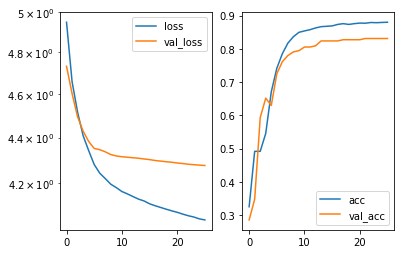

Predicted cell: Cells Probability: [[0.84839547]]
True Cell type: Cells
x [[0.27097458]]
True positional value x 0.5
y [[0.57785803]]
True positional value y 0.65625


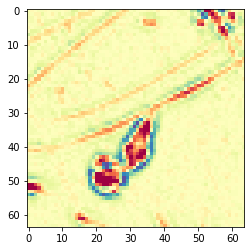

Epoch 27/250
5176/5176 [==============================] - 31s 6ms/step - loss: 4.0395 - acc: 0.8789 - val_loss: 4.2744 - val_acc: 0.8352

Epoch 00027: saving model to /home/sancere/Kepler/Incucyte/model/incucyteresnetd92.h5
{'val_loss': 4.274430177150628, 'val_acc': 0.8351648441164485, 'loss': 4.039491951004983, 'acc': 0.87886398883286, 'lr': 1e-06}


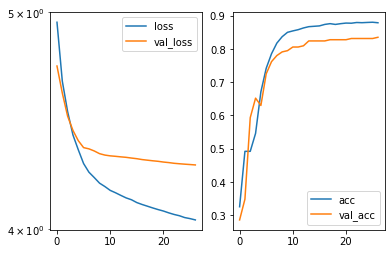

Predicted cell: Cells Probability: [[0.9543168]]
True Cell type: Cells
x [[0.46418905]]
True positional value x 0.5
y [[0.5710652]]
True positional value y 0.5


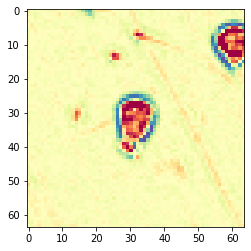

Epoch 28/250
5176/5176 [==============================] - 32s 6ms/step - loss: 4.0327 - acc: 0.8816 - val_loss: 4.2723 - val_acc: 0.8352

Epoch 00028: saving model to /home/sancere/Kepler/Incucyte/model/incucyteresnetd92.h5
{'val_loss': 4.27225814372192, 'val_acc': 0.8351648441164485, 'loss': 4.03266251787336, 'acc': 0.8815687762161679, 'lr': 1e-06}


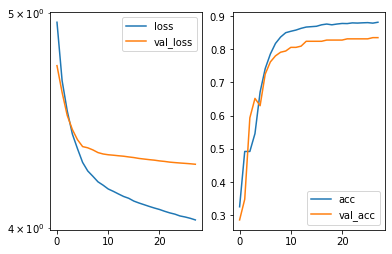

Predicted cell: Cells Probability: [[0.9602987]]
True Cell type: Cells
x [[0.52653503]]
True positional value x 0.65625
y [[0.58868295]]
True positional value y 0.34375


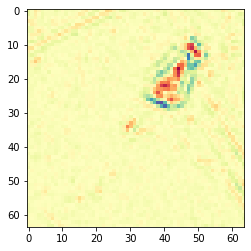

Epoch 29/250
5176/5176 [==============================] - 32s 6ms/step - loss: 4.0302 - acc: 0.8821 - val_loss: 4.2705 - val_acc: 0.8352

Epoch 00029: saving model to /home/sancere/Kepler/Incucyte/model/incucyteresnetd92.h5
{'val_loss': 4.270541199834356, 'val_acc': 0.8351648441164485, 'loss': 4.03020298628387, 'acc': 0.8821483737165814, 'lr': 1e-06}


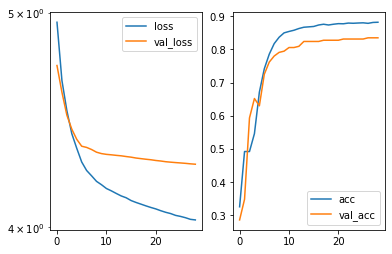

Predicted cell: Cells Probability: [[0.8341735]]
True Cell type: Normal
x [[0.25560397]]
True positional value x 0.5
y [[0.6707816]]
True positional value y 0.5


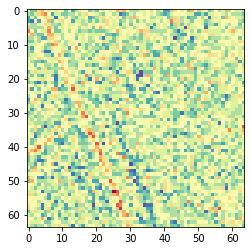

Epoch 30/250
5176/5176 [==============================] - 31s 6ms/step - loss: 4.0245 - acc: 0.8823 - val_loss: 4.2675 - val_acc: 0.8315

Epoch 00030: saving model to /home/sancere/Kepler/Incucyte/model/incucyteresnetd92.h5
{'val_loss': 4.267547734927782, 'val_acc': 0.8315018439467573, 'loss': 4.024486925170816, 'acc': 0.8823415794088815, 'lr': 1e-06}


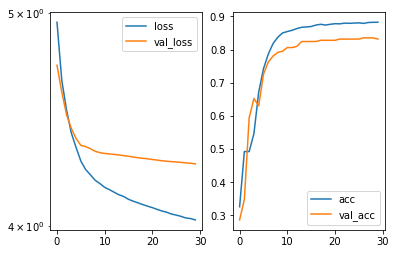

Predicted cell: Cells Probability: [[0.9804411]]
True Cell type: Normal
x [[0.6619568]]
True positional value x 0.5
y [[0.5575547]]
True positional value y 0.5


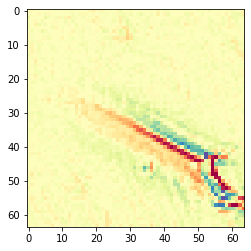

Epoch 31/250
5176/5176 [==============================] - 31s 6ms/step - loss: 4.0202 - acc: 0.8837 - val_loss: 4.2659 - val_acc: 0.8352

Epoch 00031: saving model to /home/sancere/Kepler/Incucyte/model/incucyteresnetd92.h5
{'val_loss': 4.26592477162679, 'val_acc': 0.8351648441164485, 'loss': 4.020201109476399, 'acc': 0.883693975035153, 'lr': 1e-06}


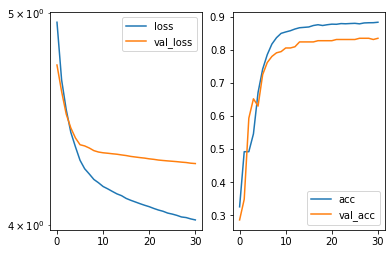

Predicted cell: Cells Probability: [[0.93288714]]
True Cell type: Cells
x [[0.5524441]]
True positional value x 0.65625
y [[0.33853987]]
True positional value y 0.34375


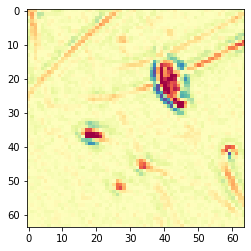

Epoch 32/250
5176/5176 [==============================] - 31s 6ms/step - loss: 4.0153 - acc: 0.8833 - val_loss: 4.2648 - val_acc: 0.8352

Epoch 00032: saving model to /home/sancere/Kepler/Incucyte/model/incucyteresnetd92.h5
{'val_loss': 4.264788573478167, 'val_acc': 0.8351648441164485, 'loss': 4.0153224779612495, 'acc': 0.8833075739224506, 'lr': 1e-06}


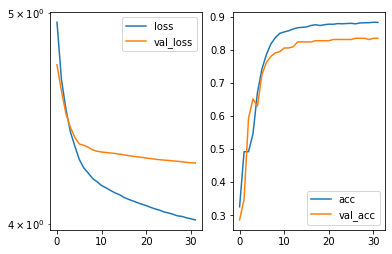

Predicted cell: Cells Probability: [[0.91961706]]
True Cell type: Cells
x [[0.45608136]]
True positional value x 0.34375
y [[0.43600604]]
True positional value y 0.5


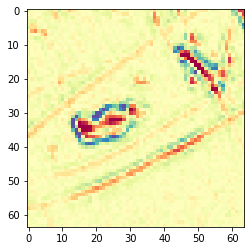

Epoch 33/250
5176/5176 [==============================] - 32s 6ms/step - loss: 4.0106 - acc: 0.8837 - val_loss: 4.2628 - val_acc: 0.8352

Epoch 00033: saving model to /home/sancere/Kepler/Incucyte/model/incucyteresnetd92.h5
{'val_loss': 4.262831883552747, 'val_acc': 0.8351648441164485, 'loss': 4.010550503015887, 'acc': 0.8836939678033684, 'lr': 1e-06}


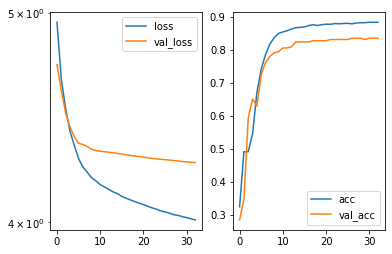

Predicted cell: Cells Probability: [[0.847189]]
True Cell type: Cells
x [[0.46403164]]
True positional value x 0.5
y [[0.728328]]
True positional value y 0.34375


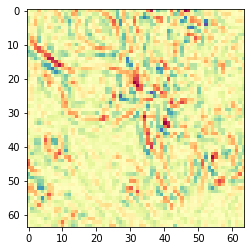

Epoch 34/250
5176/5176 [==============================] - 32s 6ms/step - loss: 4.0074 - acc: 0.8841 - val_loss: 4.2602 - val_acc: 0.8352

Epoch 00034: saving model to /home/sancere/Kepler/Incucyte/model/incucyteresnetd92.h5
{'val_loss': 4.2602330179878205, 'val_acc': 0.8351648441164485, 'loss': 4.007417083155059, 'acc': 0.8840803733380538, 'lr': 1e-06}


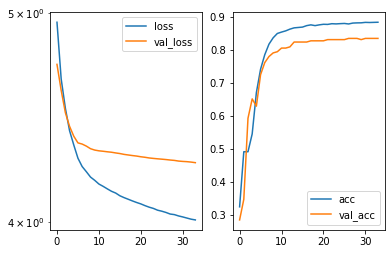

Predicted cell: Cells Probability: [[0.91251796]]
True Cell type: Cells
x [[0.65044355]]
True positional value x 0.65625
y [[0.7668731]]
True positional value y 0.65625


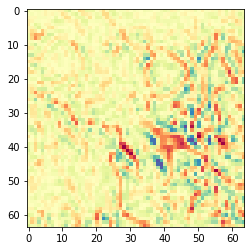

Epoch 35/250
5176/5176 [==============================] - 31s 6ms/step - loss: 4.0048 - acc: 0.8839 - val_loss: 4.2573 - val_acc: 0.8352

Epoch 00035: saving model to /home/sancere/Kepler/Incucyte/model/incucyteresnetd92.h5
{'val_loss': 4.257291909102555, 'val_acc': 0.8351648441164485, 'loss': 4.004809830251396, 'acc': 0.8838871708701161, 'lr': 1e-06}


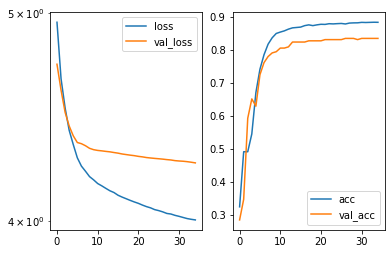

Predicted cell: Cells Probability: [[0.9680242]]
True Cell type: Cells
x [[0.35198078]]
True positional value x 0.34375
y [[0.38389757]]
True positional value y 0.34375


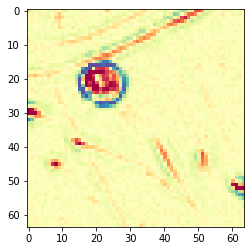

Epoch 36/250
4900/5176 [===========================>..] - ETA: 1s - loss: 3.9990 - acc: 0.8841

In [ ]:
static_model = NEATStatic(config, model_dir, model_name)

static_model.loadData()

static_model.TrainModel()
